# Titanic Data Set Classification 

In [20]:
# importing required Modules 
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#reading the data Frame
df = pd.read_excel('titanic3.xls')

In [22]:
df.sample(3)  

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
785,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.900,NaN,S,16,NaN,"West Haven, CT"
725,3,1,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.750,NaN,Q,13,NaN,Ireland
103,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C,4,NaN,"New York, NY"


In [23]:
df.shape

(1309, 14)

In [24]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


In [26]:
df.isna().any()


pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [27]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [28]:
df.drop(['name','cabin','boat','body','home.dest','ticket'],axis='columns',inplace=True)
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


In [29]:
df['age'].fillna(df['age'].mean(),inplace=True)
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.000000,0,0,211.3375,S
1,1,1,male,0.916700,1,2,151.5500,S
2,1,0,female,2.000000,1,2,151.5500,S
3,1,0,male,30.000000,1,2,151.5500,S
4,1,0,female,25.000000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.500000,1,0,14.4542,C
1305,3,0,female,29.881135,1,0,14.4542,C
1306,3,0,male,26.500000,0,0,7.2250,C
1307,3,0,male,27.000000,0,0,7.2250,C


In [30]:
df['fare'] = df['fare'].fillna(df['fare'].mean())

In [31]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode().iloc[0])

In [32]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## Data Visualization 


In [33]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns


c:\Users\tumba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


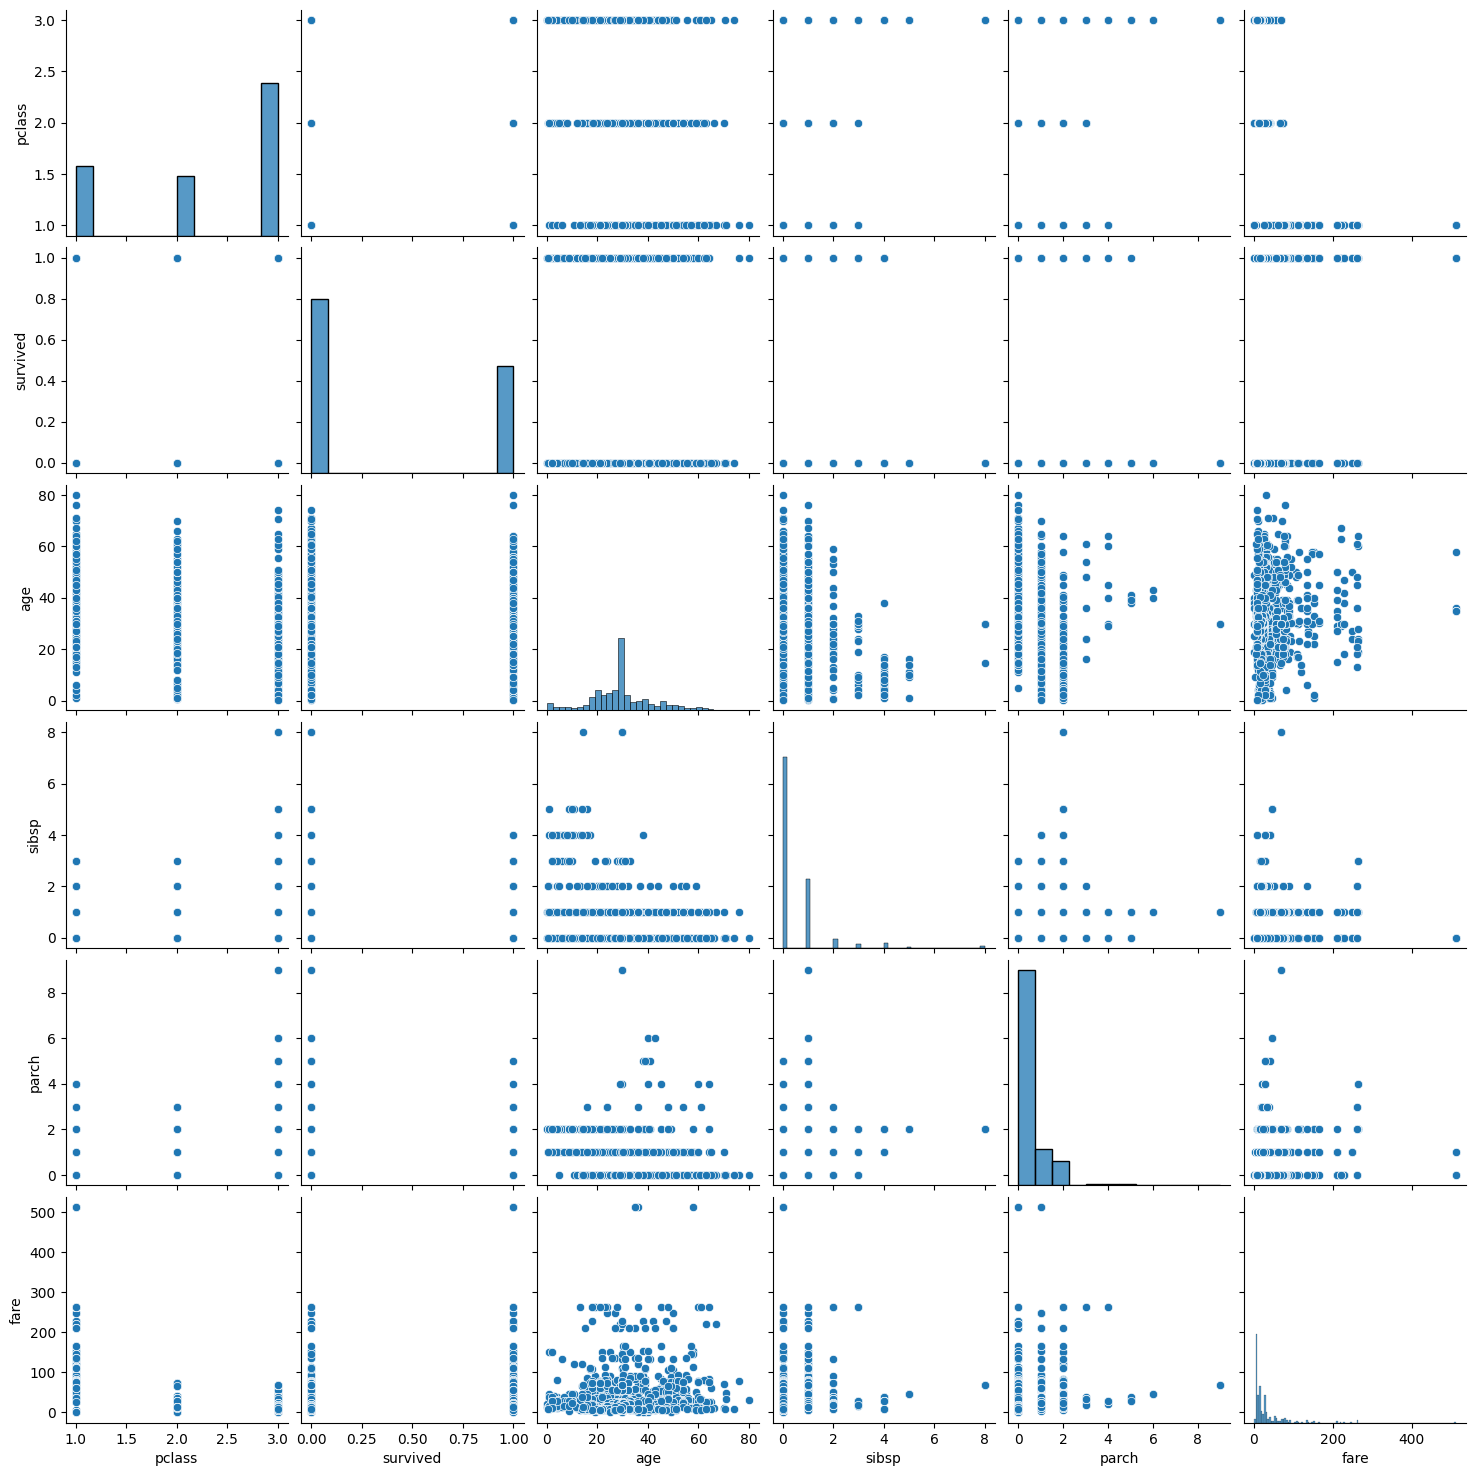

In [35]:
sns.pairplot(df)

converting the object data type into integers

In [37]:
df.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked']= le.fit_transform(df['embarked'])

In [45]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.000000,0,0,211.3375,2
1,1,1,1,0.916700,1,2,151.5500,2
2,1,0,0,2.000000,1,2,151.5500,2
3,1,0,1,30.000000,1,2,151.5500,2
4,1,0,0,25.000000,1,2,151.5500,2
...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,0
1305,3,0,0,29.881135,1,0,14.4542,0
1306,3,0,1,26.500000,0,0,7.2250,0
1307,3,0,1,27.000000,0,0,7.2250,0


In [46]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train , y_test = train_test_split(df[['pclass','sex' ,'age', 'sibsp', 'parch','embarked']],df['survived'],test_size=0.10)

# finding  the best fit model 

In [52]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,y_train)

SVC()

In [53]:
print("Accuracy :" , model1.score(X_test,y_test) * 100,"%")

Accuracy : 64.12213740458014 %


In [54]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X_train,y_train)
print(" Accuracy :",model2.score(X_test,y_test)*100,"%")

 Accuracy : 35.77892674596236 %


In [55]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train,y_train)
print(" Accuracy :",model3.score(X_test,y_test)*100,"%")

 Accuracy : 81.67938931297711 %


Random forest classification has the highest accuracy compared to other models.
So we select the Random Forest Classification 
